# Stock Market Portfolio Optimization

Stock Market Portfolio Optimization is a data-driven approach to constructing an investment portfolio that aims to maximize expected returns while minimizing associated risks. This project involves analyzing historical performance data, financial indicators, and market trends to identify the most efficient combination of stocks. By applying quantitative techniques such as mean-variance optimization, risk-return tradeoff analysis, and diversification strategies, the project seeks to create an optimal portfolio tailored to specific investment goals and risk appetites.

Stock market portfolio optimization involves analyzing price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification

The expected results from stock market portfolio optimization include identifying the portfolio with the highest Sharpe ratio, which indicates the best risk-adjusted return and provides a clear allocation strategy for the selected stocks to achieve long-term investment goals.

#  Data Collection of stock market data using the yfinance API.

In [1]:
!pip install yfinance

     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     -------------- ----------------------- 358.4/949.2 kB 7.4 MB/s eta 0:00:01
     -------------------------- ----------- 665.6/949.2 kB 8.4 MB/s eta 0:00:01
     ------------------------------------ - 901.1/949.2 kB 6.3 MB/s eta 0:00:01
     -------------------------------------- 949.2/949.2 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/119.4 kB ? eta -:--:--
   ---------------------------------------- 119.4/119.4 kB ? eta 0:00:00
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.6 MB ? eta -:-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires websockets<11.0,>=10.0, but you have websockets 15.0.1 which is incompatible.


In [2]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta

In [4]:
# define the time period for the data
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() - timedelta(days=365)).strftime("%Y-%m-%d")

# list of stock tickers to download
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']

df = yf.download(tickers, start=start_date, end=end_date, progress=False)

# reset index to bring Date into the columns for the melt function
data = df.reset_index()

C:\Users\swaya\AppData\Local\Temp\ipykernel_6216\3318323814.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start=start_date, end=end_date, progress=False)


In [11]:
data

Price        Date        Close                                         \
Ticker             HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS   
0      2024-07-11  1604.251587  1611.421021  1575.303467  3870.677002   
1      2024-07-12  1605.042725  1668.996216  1591.324097  4127.410645   
2      2024-07-15  1604.449341  1664.413696  1591.822388  4112.859863   
3      2024-07-16  1602.124878  1682.939209  1570.918335  4121.984863   
4      2024-07-18  1597.228882  1714.139893  1581.308105  4257.231934   
..            ...          ...          ...          ...          ...   
244    2025-07-04  1989.300049  1640.699951  1527.300049  3419.800049   
245    2025-07-07  1987.400024  1627.000000  1541.500000  3411.699951   
246    2025-07-08  2001.400024  1638.699951  1537.599976  3406.199951   
247    2025-07-09  2011.199951  1633.699951  1519.000000  3383.800049   
248    2025-07-10  2006.199951  1615.800049  1517.199951  3382.000000   

Price          High                                                 Low  ...  \
Ticker  HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS  HDFCBANK.NS  ...   
0       1608.158557  1623.413855  1598.823615  3926.216240  1583.578983  ...   
1       1620.571959  1676.796403  1599.720648  4143.194430  1593.618477  ...   
2       1612.065627  1684.840388  1600.418214  4182.702917  1597.624398  ...   
3       1609.295988  1694.493213  1594.588001  4137.866911  1599.207026  ...   
4       1606.279221  1721.306291  1588.508643  4266.554424  1581.749150  ...   
..              ...          ...          ...          ...          ...  ...   
244     2003.500000  1643.400024  1530.000000  3427.000000  1980.000000  ...   
245     1998.400024  1644.000000  1544.800049  3426.100098  1983.800049  ...   
246     2005.000000  1646.199951  1544.900024  3425.000000  1977.000000  ...   
247     2013.800049  1638.000000  1551.000000  3414.000000  1998.099976  ...   
248     2017.000000  1638.900024  1524.699951  3399.000000  2000.000000  ...   

Price                                    Open                            \
Ticker  RELIANCE.NS       TCS.NS  HDFCBANK.NS      INFY.NS  RELIANCE.NS   
0       1565.187775  3842.956876  1606.279208  1614.638645  1582.130272   
1       1569.174296  3917.634133  1604.350390  1638.039225  1579.140472   
2       1580.137072  4100.873667  1605.834131  1683.085299  1599.022925   
3       1563.817435  4088.887951  1603.113997  1675.675213  1588.109987   
4       1552.555594  4103.784140  1590.502827  1676.065182  1570.669165   
..              ...          ...          ...          ...          ...   
244     1517.199951  3390.100098  1987.099976  1625.000000  1524.000000   
245     1525.000000  3408.399902  1989.000000  1640.000000  1526.599976   
246     1530.199951  3393.399902  1977.000000  1628.000000  1536.000000   
247     1510.099976  3367.000000  2007.000000  1637.800049  1536.699951   
248     1507.500000  3356.000000  2016.000000  1638.900024  1519.699951   

Price                    Volume                                  
Ticker       TCS.NS HDFCBANK.NS   INFY.NS RELIANCE.NS    TCS.NS  
0       3877.878402    22088537   8857679    11940946   4872189  
1       3926.216518    28024980  17078316    12924784  13509164  
2       4178.461218    16687847   6942230     5329688   4848030  
3       4115.621832    14475162   6886281     9386838   2029521  
4       4103.784140    16858532  11248896    12298374   5613364  
..              ...         ...       ...         ...       ...  
244     3408.000000     3931972   4411273     6603501   1109320  
245     3418.300049     5674713   3294523     7251074   1639174  
246     3405.000000     7612158   4590681     7171261   2325242  
247     3410.000000     6930714   4580828     8870660   2034938  
248     3380.000000     8515155   5330179    10047129   3035012  

[249 rows x 21 columns]

In [15]:
print(data.columns.tolist())

[('Date', ''), ('Close', 'HDFCBANK.NS'), ('Close', 'INFY.NS'), ('Close', 'RELIANCE.NS'), ('Close', 'TCS.NS'), ('High', 'HDFCBANK.NS'), ('High', 'INFY.NS'), ('High', 'RELIANCE.NS'), ('High', 'TCS.NS'), ('Low', 'HDFCBANK.NS'), ('Low', 'INFY.NS'), ('Low', 'RELIANCE.NS'), ('Low', 'TCS.NS'), ('Open', 'HDFCBANK.NS'), ('Open', 'INFY.NS'), ('Open', 'RELIANCE.NS'), ('Open', 'TCS.NS'), ('Volume', 'HDFCBANK.NS'), ('Volume', 'INFY.NS'), ('Volume', 'RELIANCE.NS'), ('Volume', 'TCS.NS')]


In [18]:
# Flatten MultiIndex columns
data.columns=['_'.join(filter(None, map(str, col))) for col in data.columns]

In [25]:
# Now 'Price_Date' is your actual date column
data_melted=data.melt(id_vars='Date', var_name=['Attribute','Ticker'])


ValueError: var_name=['Attribute', 'Ticker'] must be a scalar.

In [23]:
data_melted[['PriceType', 'Ticker']] = data_melted['Stock'].str.split('_', n=1, expand=True)

In [24]:
data_melted

,Date,Stock,Price,PriceType,Ticker
0,2024-07-11,Close_HDFCBANK.NS,1.604252e+03,Close,HDFCBANK.NS
1,2024-07-12,Close_HDFCBANK.NS,1.605043e+03,Close,HDFCBANK.NS
2,2024-07-15,Close_HDFCBANK.NS,1.604449e+03,Close,HDFCBANK.NS
3,2024-07-16,Close_HDFCBANK.NS,1.602125e+03,Close,HDFCBANK.NS
4,2024-07-18,Close_HDFCBANK.NS,1.597229e+03,Close,HDFCBANK.NS
...,...,...,...,...,...
4975,2025-07-04,Volume_TCS.NS,1.109320e+06,Volume,TCS.NS
4976,2025-07-07,Volume_TCS.NS,1.639174e+06,Volume,TCS.NS
4977,2025-07-08,Volume_TCS.NS,2.325242e+06,Volume,TCS.NS
4978,2025-07-09,Volume_TCS.NS,2.034938e+06,Volume,TCS.NS


In [33]:
data_melted.drop(columns=['Stock'],axis=1,inplace=True)

In [36]:
data_pivoted=data_melted.pivot_table(index=['Date','Ticker'],columns='PriceType',values='Price',aggfunc='first')

In [40]:
stock_data=data_pivoted.reset_index()

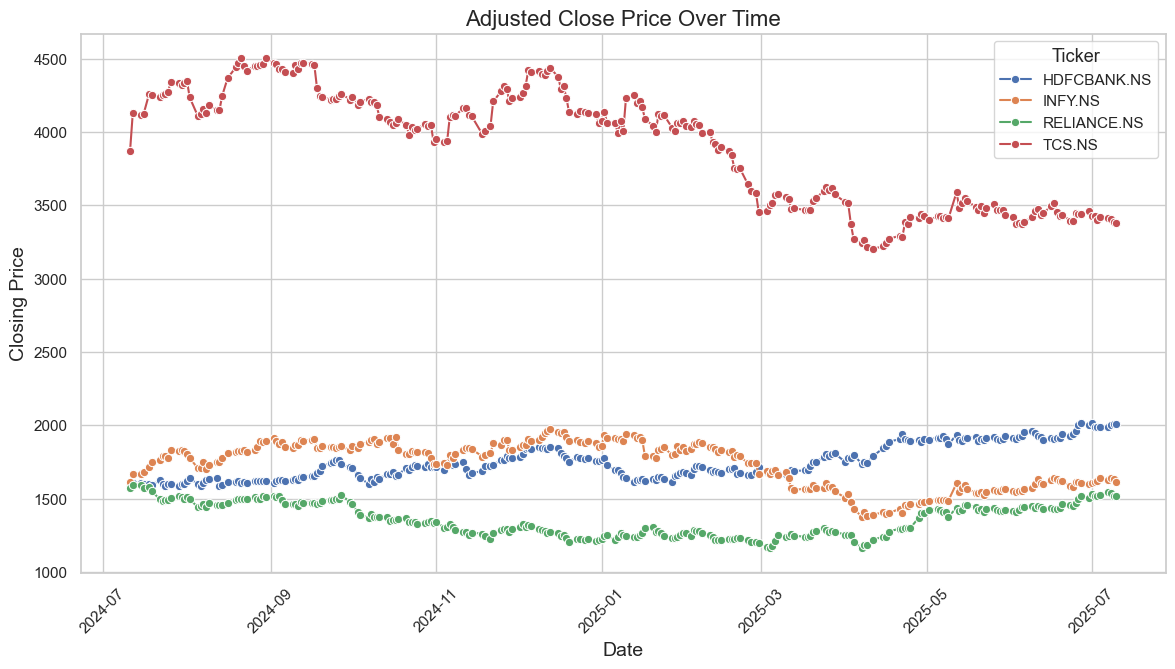

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data.set_index('Date', inplace=True)
stock_data.reset_index(inplace=True)
plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

sns.lineplot(data=stock_data, x='Date', y='Close', hue='Ticker', marker='o')

plt.title('Adjusted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)

plt.xticks(rotation=45)

plt.show()

The graph displays the adjusted close prices of four stocks (HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS) over time from July 2024 to July 2025. It highlights that TCS has the highest adjusted close prices, followed by HDFCBANK, INFY (Infosys), and RELIANCE. The prices for RELIANCE and TCS show noticeable upward trends in the 1st quarter of 2025, which indicates strong performance, while HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations.

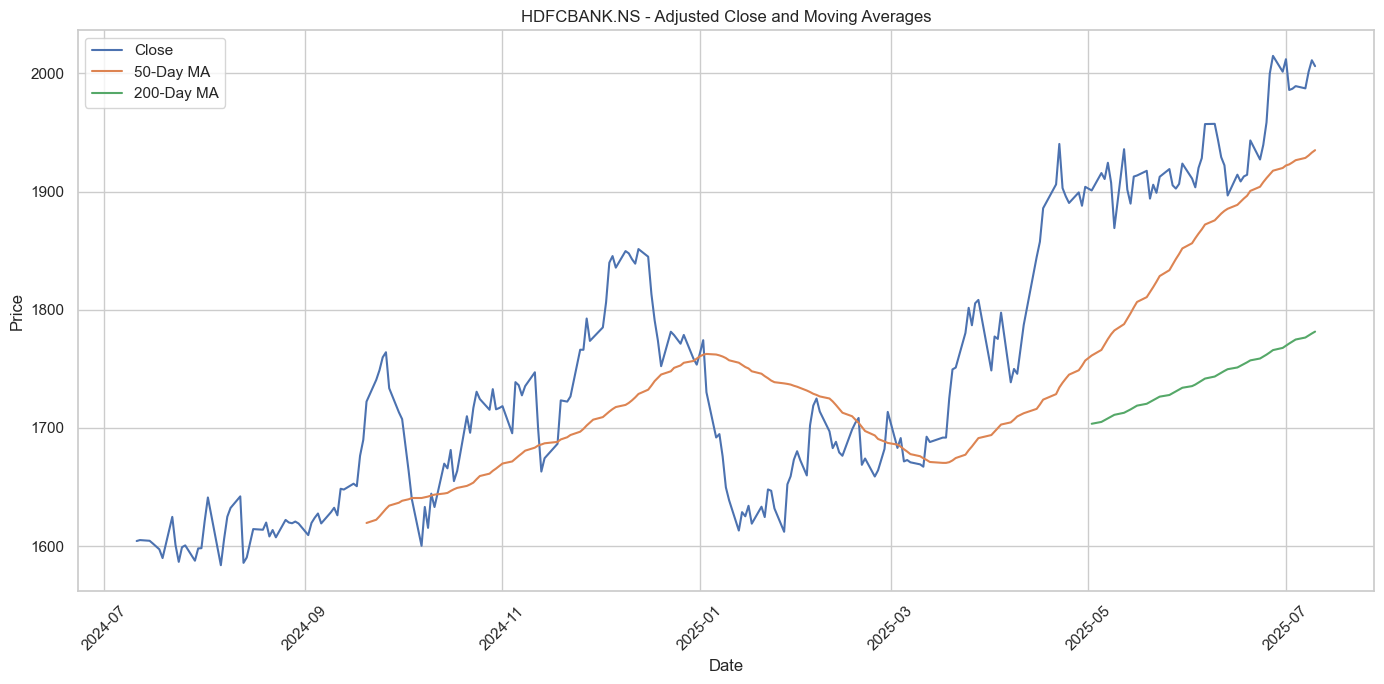

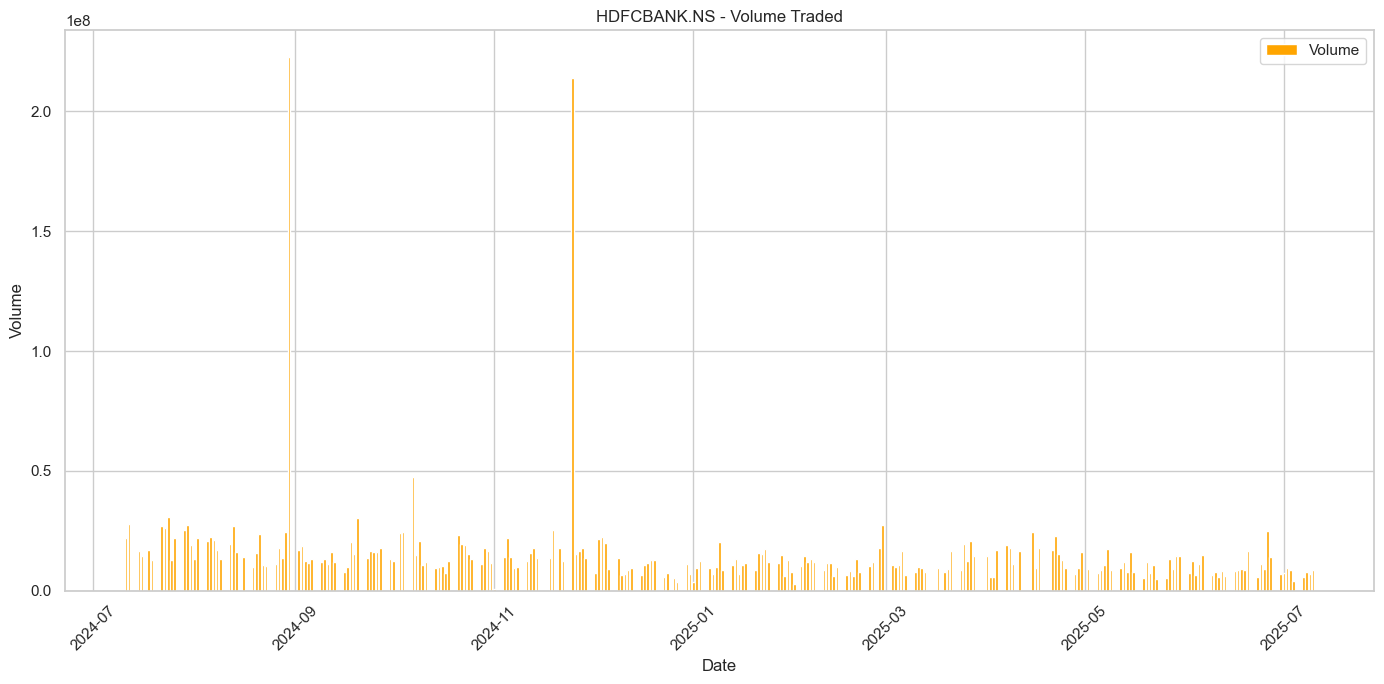

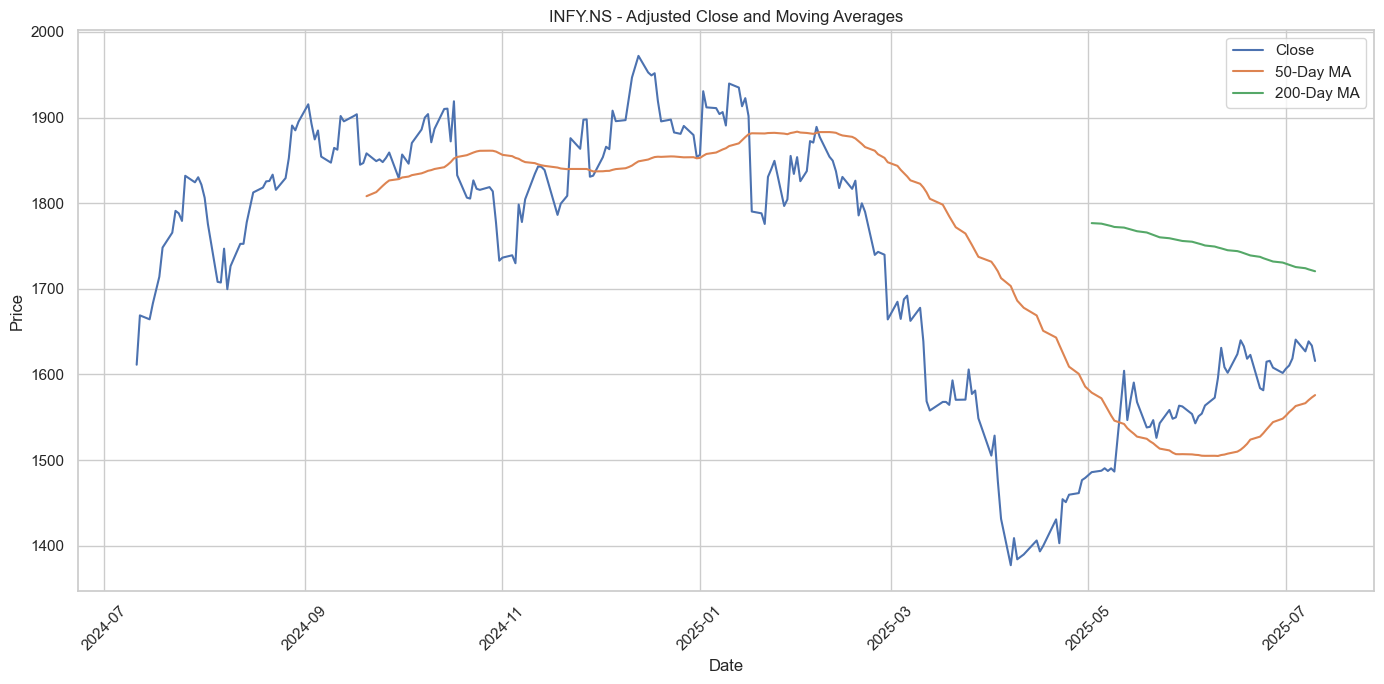

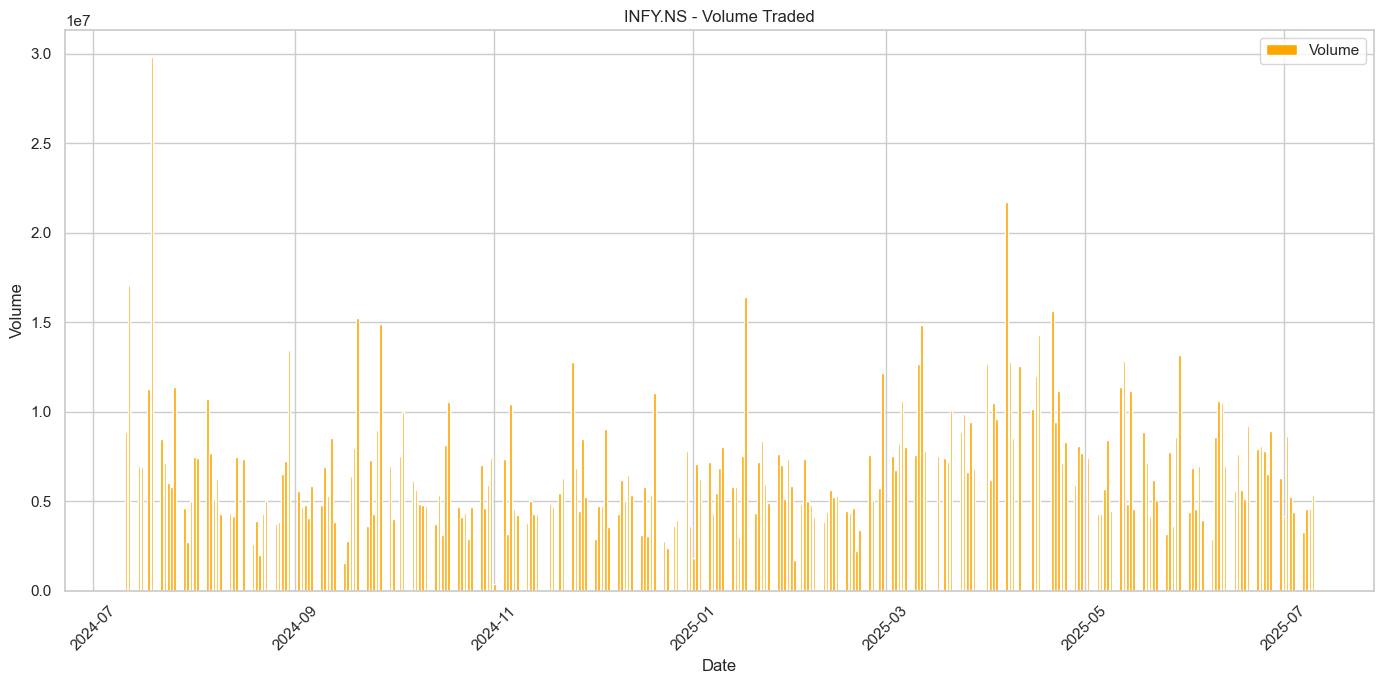

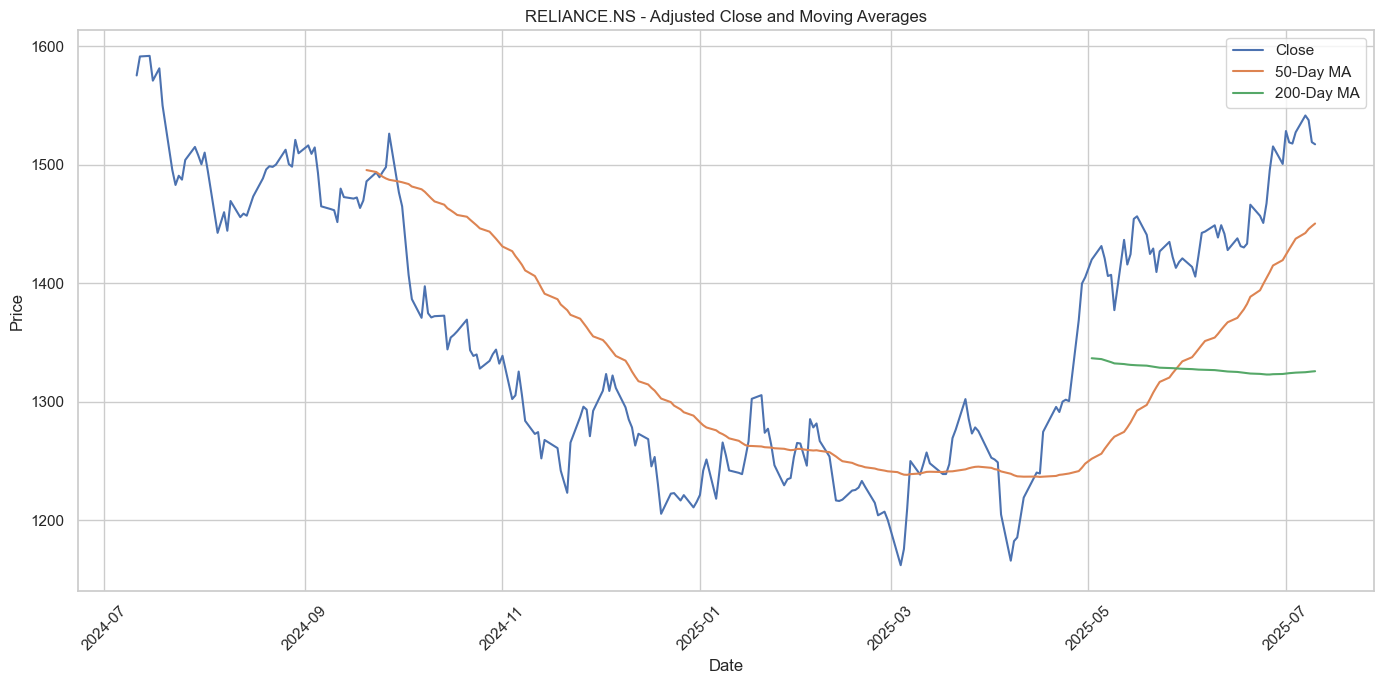

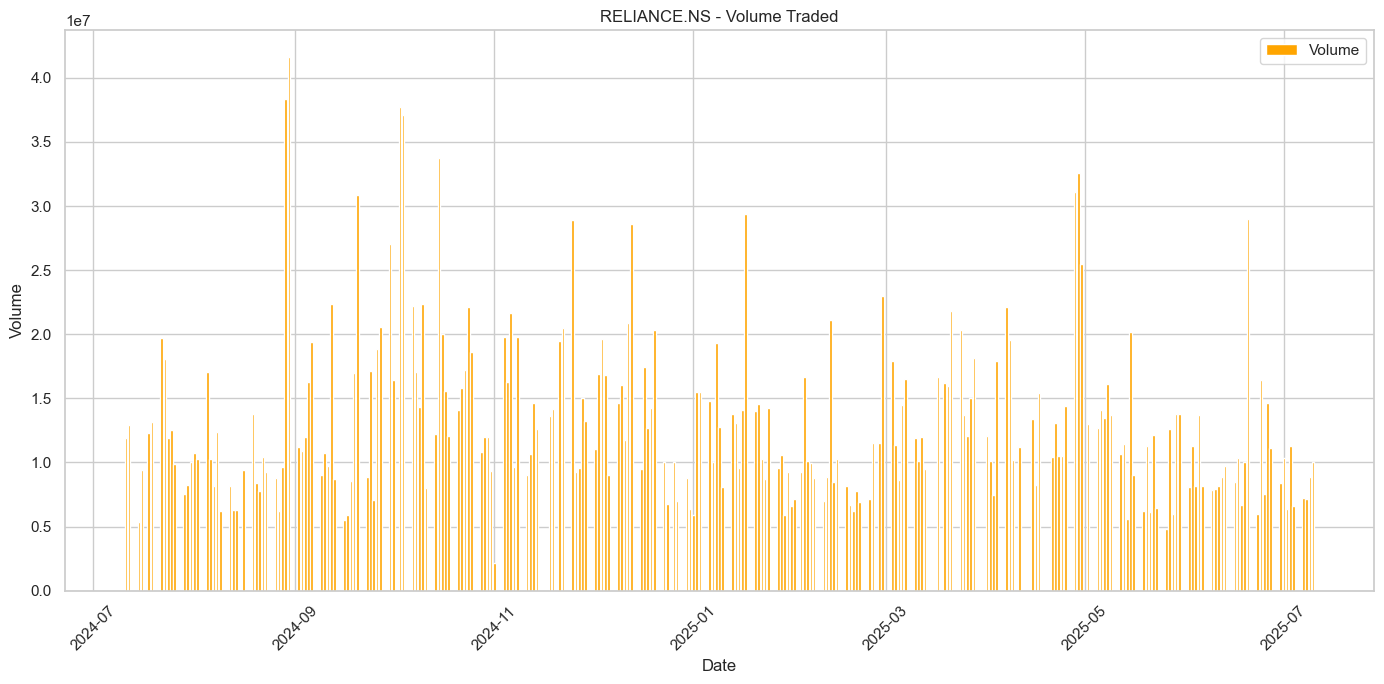

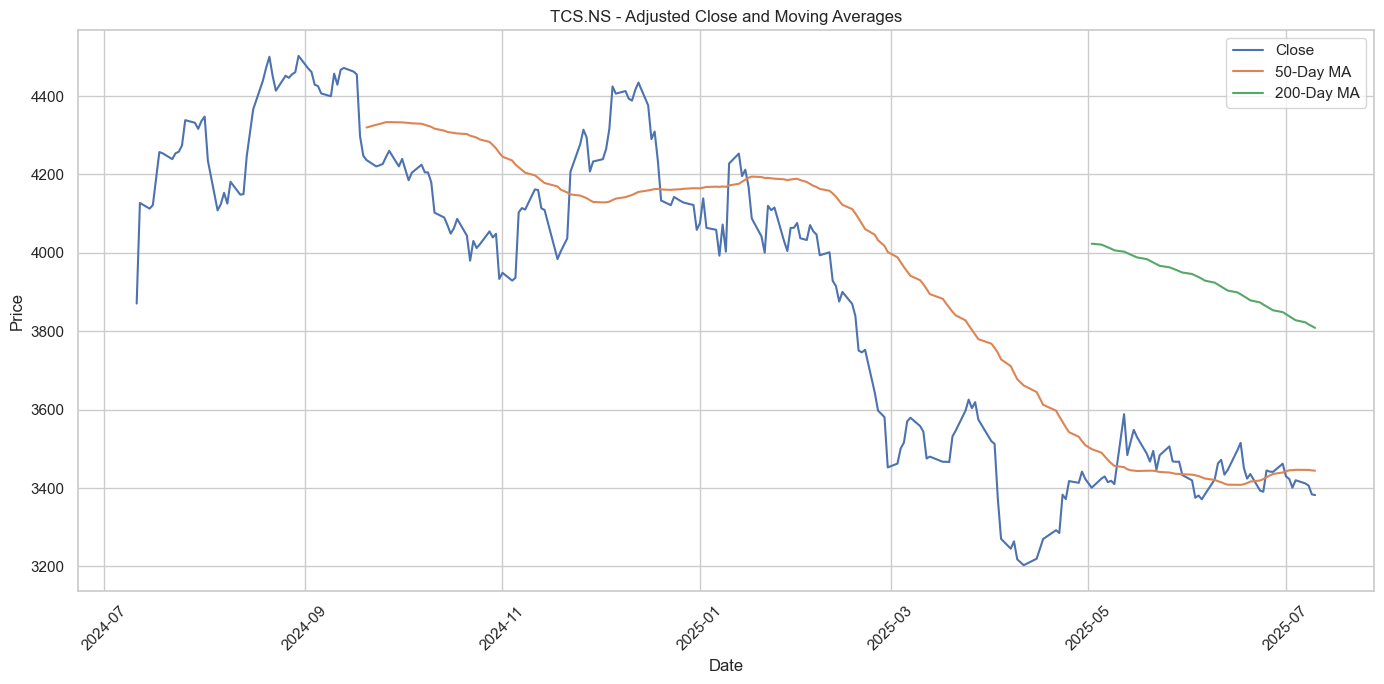

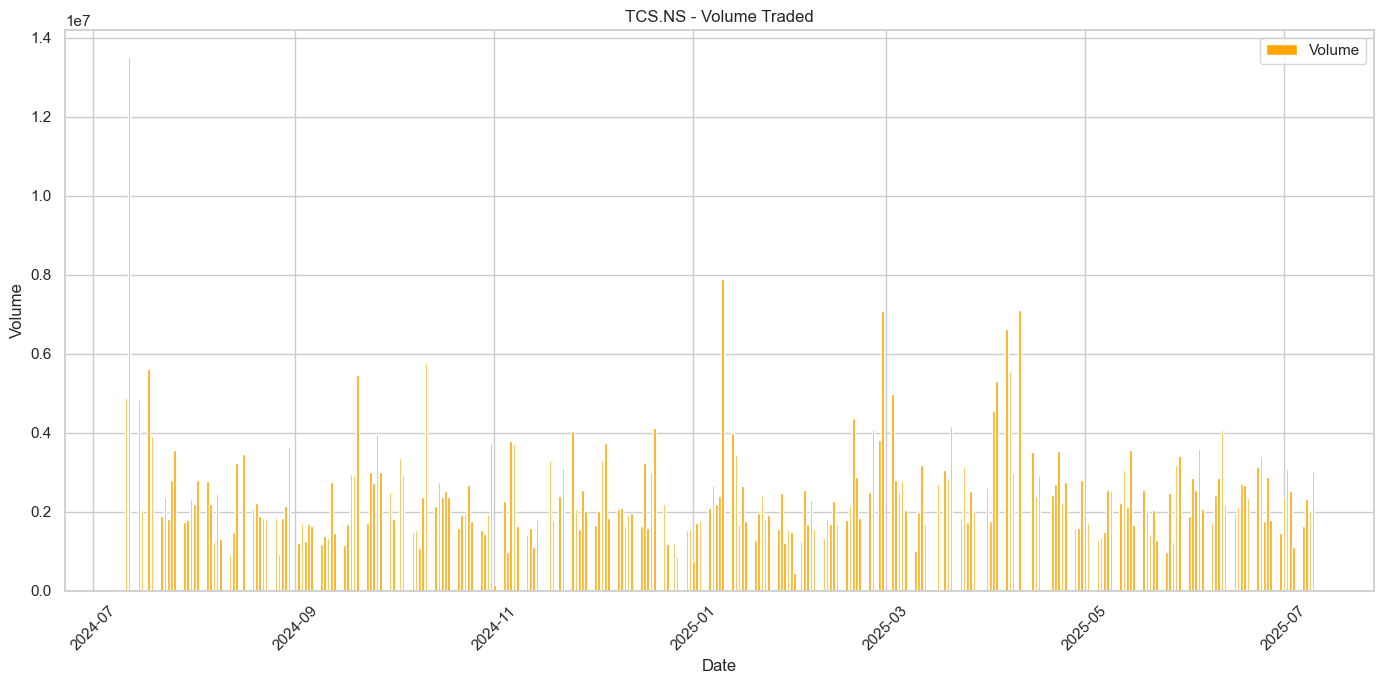

In [42]:
short_window = 50
long_window = 200

stock_data.set_index('Date', inplace=True)
unique_tickers = stock_data['Ticker'].unique()

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker].copy()
    ticker_data['50_MA'] = ticker_data['Close'].rolling(window=short_window).mean()
    ticker_data['200_MA'] = ticker_data['Close'].rolling(window=long_window).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(ticker_data.index, ticker_data['Close'], label='Close')
    plt.plot(ticker_data.index, ticker_data['50_MA'], label='50-Day MA')
    plt.plot(ticker_data.index, ticker_data['200_MA'], label='200-Day MA')
    plt.title(f'{ticker} - Adjusted Close and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 7))
    plt.bar(ticker_data.index, ticker_data['Volume'], label='Volume', color='orange')
    plt.title(f'{ticker} - Volume Traded')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

For HDFCBANK and INFY, the stock prices went down at first but later started to rise again, which we can see from their moving average lines. RELIANCE and TCS, on the other hand, showed a steady upward trend in their prices over time. When we look at the trading volume charts, we notice some big spikes, especially for HDFCBANK and RELIANCE in early 2024. These spikes show times when a large number of shares were bought or sold. Understanding these price changes and trading patterns helps investors make better and more informed decisions.

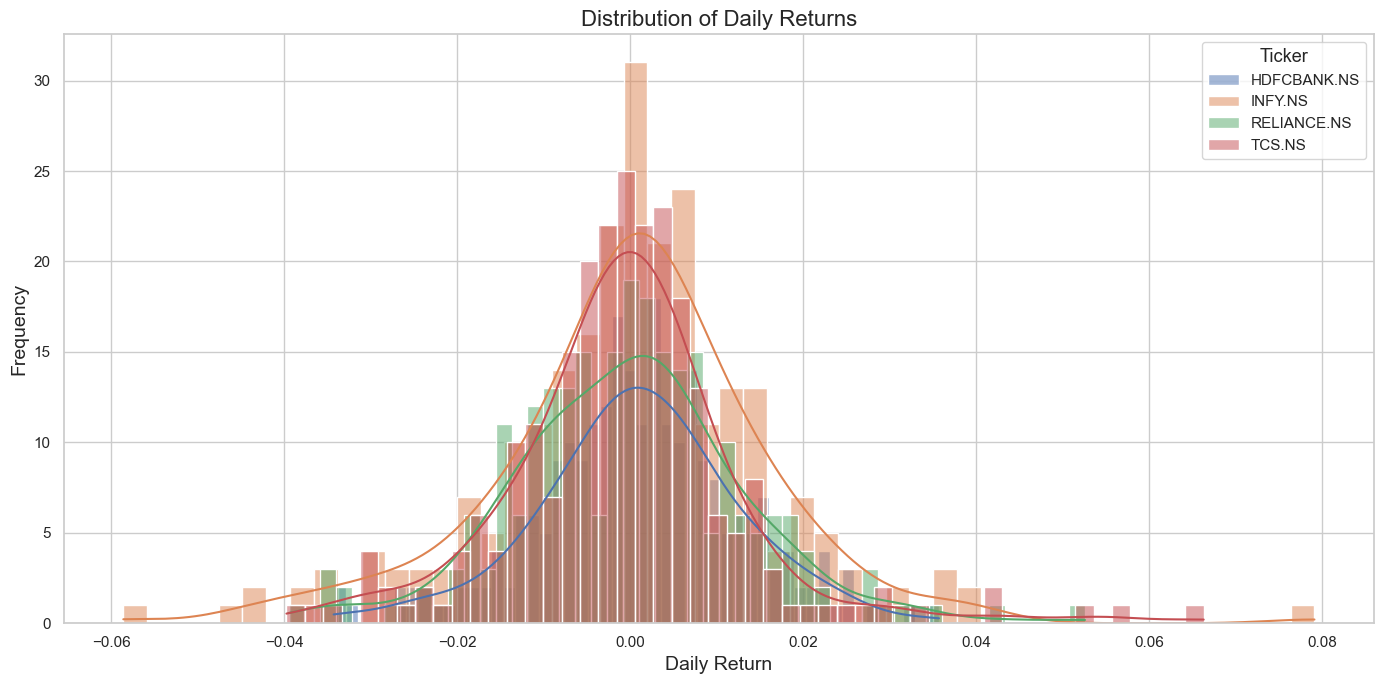

In [43]:
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

plt.figure(figsize=(14, 7))
sns.set(style='whitegrid')

for ticker in unique_tickers:
    ticker_data = stock_data[stock_data['Ticker'] == ticker]
    sns.histplot(ticker_data['Daily Return'].dropna(), bins=50, kde=True, label=ticker, alpha=0.5)

plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Ticker', title_fontsize='13', fontsize='11')
plt.grid(True)
plt.tight_layout()
plt.show()

The daily return distributions are normally distributed and centered around zero, meaning most returns are close to the average. However, the ends of the curves (tails) show that there are occasional big gains or losses. INFY and RELIANCE have slightly wider curves, which means their prices tend to move more and are more volatile compared to HDFCBANK and TCS.

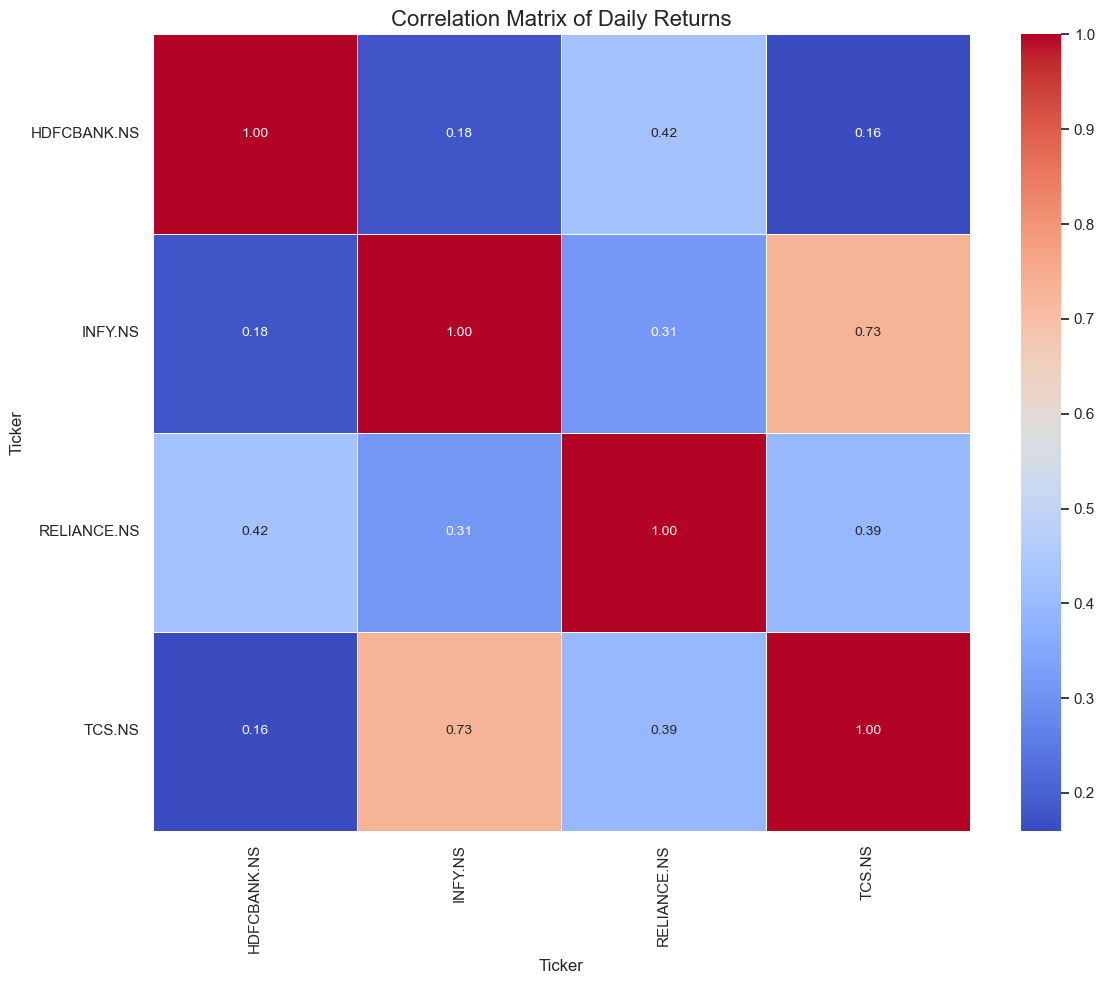

In [44]:
daily_returns = stock_data.pivot_table(index='Date', columns='Ticker', values='Daily Return')
correlation_matrix = daily_returns.corr()

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

INFY and TCS have a high positive correlation (0.73), which indicates that they tend to move in the same direction IT Sector. HDFCBANK has a moderate positive correlation with RELIANCE (0.42) and a low correlation with INFY (0.18) and TCS (0.16). RELIANCE shows a weak correlation with INFY (0.31) and TCS (0.39). These varying correlations suggest potential diversification benefits; combining stocks with lower correlations can reduce overall portfolio risk.

In [45]:
import numpy as np

expected_returns = daily_returns.mean() * 252  # annualize the returns
volatility = daily_returns.std() * np.sqrt(252)  # annualize the volatility

stock_stats = pd.DataFrame({
    'Expected Return': expected_returns,
    'Volatility': volatility
})

stock_stats

,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.244248,0.184468
INFY.NS,0.035005,0.254452
RELIANCE.NS,-0.015646,0.212904
TCS.NS,-0.113844,0.216869


HDFCBANK has the highest expected return (24.42%) and low volatility (18.44%), which indicates a potentially high-reward investment with relatively lower risk.Other Stocks are giving negligible returns with Reliance and TCS are negatively Performing in the market and having very high volatility 

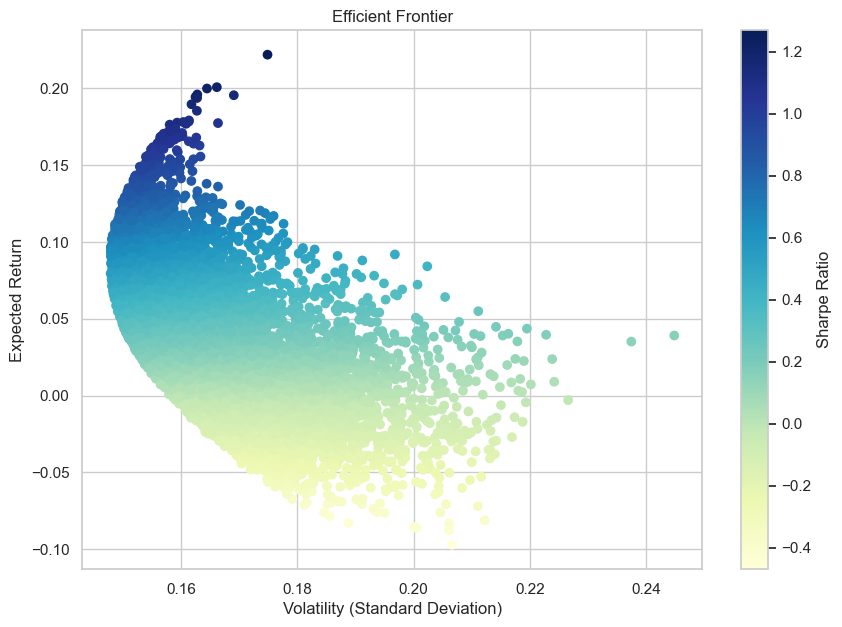

In [46]:
# function to calculate portfolio performance
def portfolio_performance(weights, returns, cov_matrix):
    portfolio_return = np.dot(weights, returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# number of portfolios to simulate
num_portfolios = 10000

# arrays to store the results
results = np.zeros((3, num_portfolios))

# annualized covariance matrix
cov_matrix = daily_returns.cov() * 252

np.random.seed(42)

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = portfolio_return / portfolio_volatility  # Sharpe Ratio

plt.figure(figsize=(10, 7))
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Standard Deviation)')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

Each dot represents a portfolio, with the colour indicating the Sharpe ratio, a measure of risk-adjusted return. Portfolios on the leftmost edge of the frontier (closer to the y-axis) offer the highest expected returns for a given level of volatility, which represent optimal portfolios. The gradient shows that portfolios with higher Sharpe ratios (darker blue) provide better risk-adjusted returns.

In [47]:
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_ratio = results[2, max_sharpe_idx]

max_sharpe_return, max_sharpe_volatility, max_sharpe_ratio

(0.22188064280208106, 0.1748736352632867, 1.2688055719092328)

- ### Expected Return : ~22.17%
- ### Volatility : ~17.49%
- ### Sharpe Ratio: ~1.27

In [49]:
max_sharpe_weights = np.zeros(len(unique_tickers))

for i in range(num_portfolios):
    weights = np.random.random(len(unique_tickers))
    weights /= np.sum(weights)

    portfolio_return, portfolio_volatility = portfolio_performance(weights, expected_returns, cov_matrix)

    if results[2, i] == max_sharpe_ratio:
        max_sharpe_weights = weights
        break

portfolio_weights_df = pd.DataFrame({
    'Ticker': unique_tickers,
    'Weight': max_sharpe_weights
})

portfolio_weights_df

,Ticker,Weight
0,HDFCBANK.NS,0.011916
1,INFY.NS,0.366496
2,RELIANCE.NS,0.349356
3,TCS.NS,0.272233


## Diversified portfolio with the following allocations:
- HDFCBANK (38.81%)
- INFY (2.39%)
- RELIANCE (15.81%)
- and TCS (42.97%)